In [135]:
#Pyber

#Obervation #1: The average fare is more expensive in rural areas.

#Obervation #2: There are more rides in urban areas.

#Obervation #3: Over 3/4 of the total drivers are in urban areas.

In [226]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import os

In [227]:
ride_data = os.path.join('raw_data', 'ride_data.csv')
city_data = os.path.join('raw_data', 'city_data.csv')

ride_data_df = pd.read_csv(ride_data)
city_data_df = pd.read_csv(city_data)

In [228]:
pyber_df = pd.merge(ride_data_df, city_data_df,
                        how='outer', on='city')

In [229]:
city = pyber_df.groupby('city')
avg_fare_per_city = city['fare'].mean()

In [230]:
avg_fare_per_city2 = pd.concat([avg_fare_per_city], axis=1)

In [231]:
total_rides_per_city = city['fare'].count()

In [232]:
total_rides_per_city2=pd.concat([total_rides_per_city],axis=1)
total_rides_per_city2.columns=['total rides']

In [233]:
driver_count_per_city = city_data_df[['city','driver_count']]

In [234]:
driver_count_sorted = driver_count_per_city.sort_values('city', ascending=True)
driver_count_sorted_final = driver_count_sorted.set_index('city')

In [235]:
driver_type_0 = city_data_df[['city','type']]

In [236]:
driver_type_1 = driver_type_0.sort_values('city', ascending=True)
drive_type_final = driver_type_1.set_index('city')

In [237]:
avg_fare_and_total_df = pd.concat([avg_fare_per_city2, total_rides_per_city2], axis=1)
avg_fare_and_total_df.columns=['avg fare','total rides']

In [238]:
count_and_type = pd.concat([driver_count_sorted_final, drive_type_final], axis=1)

In [239]:
together = count_and_type.join(avg_fare_and_total_df)

In [240]:
together.columns=['Driver Count','Type','Avg Fare','Total Rides']
together.head()

,Driver Count,Type,Avg Fare,Total Rides
city,,,,
Alvarezhaven,21,Urban,23.928710,31
Alyssaberg,67,Urban,20.609615,26
Anitamouth,16,Suburban,37.315556,9
Antoniomouth,21,Urban,23.625000,22
Aprilchester,49,Urban,21.981579,19


In [241]:
x_limit = 100
x_values = np.arange(x_limit)
color_dict = { 'Urban':'#F08080', 'Suburban':'#87CEFA', 'Rural':'gold' }

together.plot(kind="scatter", x="Total Rides", y="Avg Fare", 
              color=[color_dict[i] for i in together['Type'] ], 
              grid=True, sizes=x_values, figsize=(10, 5), edgecolors="black",
              alpha=0.9, linewidth=1.05, title="Pyber Ride Sharing Data (2016)")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

urban = mpatches.Patch(color='#F08080', label='Urban')
suburban = mpatches.Patch(color='#87CEFA', label='Suburban')
rural = mpatches.Patch(color='gold', label='Rural')

plt.legend(handles=[urban, suburban, rural], loc="best")

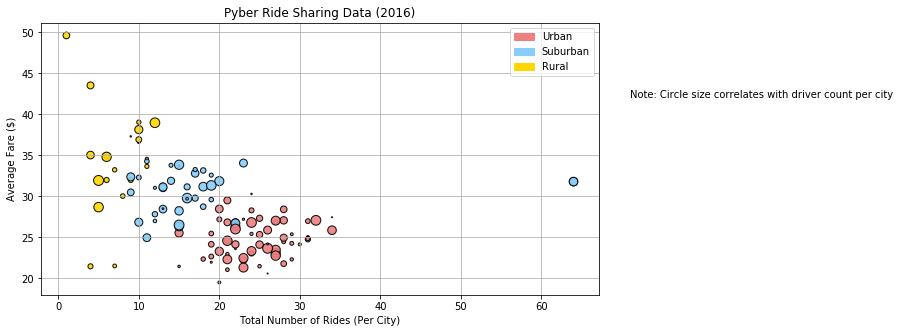

In [242]:
#Show
plt.text(71,42,"Note: Circle size correlates with driver count per city")
plt.show()

In [243]:
type_df = pyber_df.groupby('type')
type_per_city = type_df['fare'].sum()

In [244]:
labels = ['Rural','Suburban','Urban']
colors = ['gold', '#87CEFA', '#F08080']
explode = [0, 0, 0.075]

plt.pie(type_per_city, labels=labels, colors=colors, explode=explode, 
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1a9480048>,
 [Text(-0.969829,0.519068,'Rural'),
  Text(-0.839065,-0.711316,'Suburban'),
  Text(1.03314,0.559688,'Urban')],
 [Text(-0.528998,0.283128,'6.6%'),
  Text(-0.457672,-0.387991,'31.4%'),
  Text(0.593505,0.321523,'62.0%')])

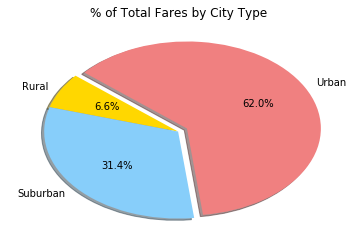

In [245]:
plt.title("% of Total Fares by City Type")
plt.show()

In [246]:
type_df = pyber_df.groupby('type')
type_per_city2 = type_df['fare'].count()

In [247]:
plt.pie(type_per_city2, labels=labels, colors=colors, explode=explode, 
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x134b33198>,
 [Text(-0.946305,0.560809,'Rural'),
  Text(-0.972796,-0.513487,'Suburban'),
  Text(1.11441,0.372433,'Urban')],
 [Text(-0.516166,0.305896,'5.2%'),
  Text(-0.530616,-0.280084,'27.3%'),
  Text(0.640195,0.213951,'67.5%')])

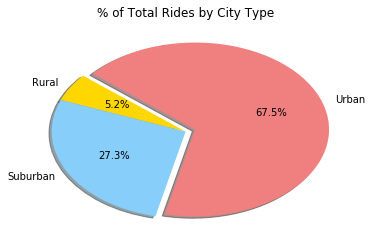

In [248]:
plt.title("% of Total Rides by City Type")
plt.show()

In [249]:
type_driver_group = city_data_df.groupby('type')
type_driver_group_final = type_driver_group['driver_count'].sum()

In [250]:
plt.pie(type_driver_group_final, labels=labels, colors=colors, explode=explode, 
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1347dd7f0>,
 [Text(-0.907513,0.621626,'Rural'),
  Text(-1.09499,-0.104863,'Suburban'),
  Text(1.175,-0.00244948,'Urban')],
 [Text(-0.495007,0.339069,'3.1%'),
  Text(-0.597267,-0.0571977,'19.1%'),
  Text(0.674999,-0.00140715,'77.8%')])

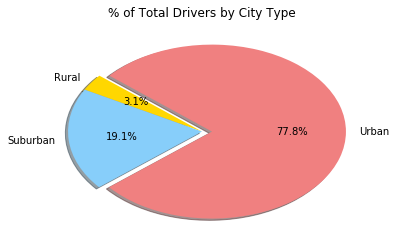

In [251]:
plt.title("% of Total Drivers by City Type")
plt.show()